In [61]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#data = arff.loadarff(r"C:\SIVA\INEURON\EDA\Phishing\Training_Dataset.arff")
data=pd.read_csv('Phishing_Legitimate_full.csv')

In [25]:
data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [30]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [31]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

In [32]:
data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [33]:
data_copy = data.copy()

In [35]:
data_copy.head(5)


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [37]:
data_copy.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
2075,2076,2,1,2,55,1,1,0,0,0,...,0,0,0,1,0,1,1,1,-1,1
4570,4571,6,0,5,86,1,0,0,0,0,...,1,0,0,1,-1,0,1,0,-1,1
4814,4815,4,1,3,43,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1
2282,2283,4,1,5,80,0,0,0,0,1,...,0,0,0,1,-1,1,1,1,1,1
6305,6306,3,1,3,75,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0


In [40]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


In [50]:
data_copy['NumDots'].nunique()

17

In [51]:
data_copy['UrlLength'].nunique()

226

In [53]:
data_copy['UrlLength'].value_counts

<bound method IndexOpsMixin.value_counts of 0        72
1       144
2        58
3        79
4        46
       ... 
9995     50
9996     59
9997     57
9998     49
9999     52
Name: UrlLength, Length: 10000, dtype: int32>

In [54]:
data_copy['labels'].nunique()

2

<AxesSubplot: >

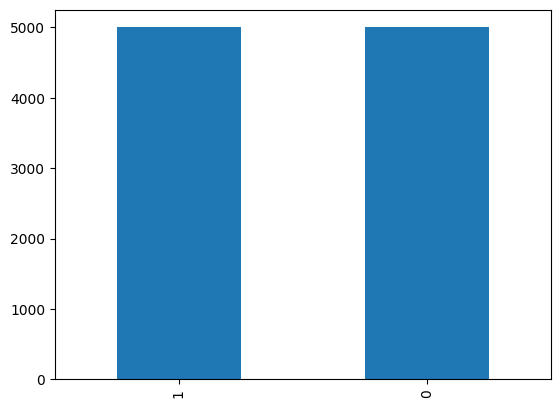

In [58]:
data_copy['labels'].value_counts().plot(kind='bar')

In [78]:
def corr_map(data_copy, idx_s, idx_e):
    y = data_copy['labels']
    temp = data_copy.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
        temp['labels'] = y
        sns.heatmap(temp.corr(), annot=True, fmt='.2f')
        plt.show()

In [102]:
df_new1 = data_copy[['FakeLinkInStatusBar', 'labels']]

In [88]:
df_new.corr(method='spearman')

,AbnormalFormAction,labels
AbnormalFormAction,1.000000,-0.145073
labels,-0.145073,1.000000


In [92]:
df_new = data_copy[['FakeLinkInStatusBar', 'labels','MissingTitle', 'ImagesOnlyInForm']]
df_new.corr(method='spearman')

,FakeLinkInStatusBar,labels,MissingTitle,ImagesOnlyInForm
FakeLinkInStatusBar,1.000000,-0.014873,-0.013565,-0.013168
labels,-0.014873,1.000000,0.116693,-0.001165
MissingTitle,-0.013565,0.116693,1.000000,-0.032298
ImagesOnlyInForm,-0.013168,-0.001165,-0.032298,1.000000


In [94]:
data_copy.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [99]:
df_new = data_copy[['IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT', 'labels']]
df_new.corr(method='spearman')

,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
IframeOrFrame,1.000000,-0.029128,-0.031041,-0.023111,-0.074459,-0.274447,-0.165420,-0.139008,-0.077053,-0.235233
MissingTitle,-0.029128,1.000000,-0.032298,0.011741,0.057453,0.026626,0.035278,0.162332,0.053869,0.116693
ImagesOnlyInForm,-0.031041,-0.032298,1.000000,0.020075,0.031993,0.045440,-0.036074,0.026179,-0.037490,-0.001165
SubdomainLevelRT,-0.023111,0.011741,0.020075,1.000000,0.136592,-0.058509,-0.017644,-0.078945,0.072653,-0.057792
UrlLengthRT,-0.074459,0.057453,0.031993,0.136592,1.000000,0.022579,0.034128,0.015285,-0.147032,0.169192
PctExtResourceUrlsRT,-0.274447,0.026626,0.045440,-0.058509,0.022579,1.000000,0.155036,0.487458,0.195410,0.073768
AbnormalExtFormActionR,-0.165420,0.035278,-0.036074,-0.017644,0.034128,0.155036,1.000000,0.142690,-0.024143,0.180029
ExtMetaScriptLinkRT,-0.139008,0.162332,0.026179,-0.078945,0.015285,0.487458,0.142690,1.000000,0.157502,0.146460
PctExtNullSelfRedirectHyperlinksRT,-0.077053,0.053869,-0.037490,0.072653,-0.147032,0.195410,-0.024143,0.157502,1.000000,-0.514305
labels,-0.235233,0.116693,-0.001165,-0.057792,0.169192,0.073768,0.180029,0.146460,-0.514305,1.000000


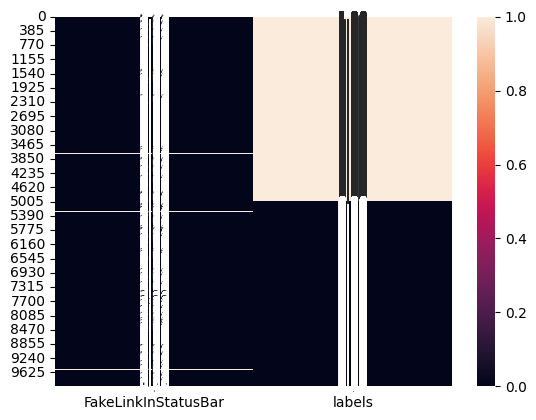

In [105]:
sns.heatmap(df_new1, annot=True, fmt='.2f')
plt.show()

In [147]:
def corr_fun(data_copy, idx_s, idx_e):
    y = data_copy['labels']
    temp = data_copy.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

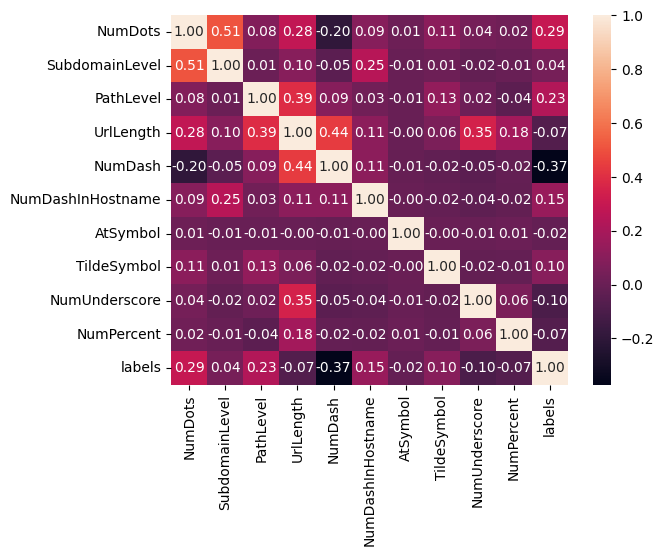

In [149]:
corr_fun(data_copy, 0,10)

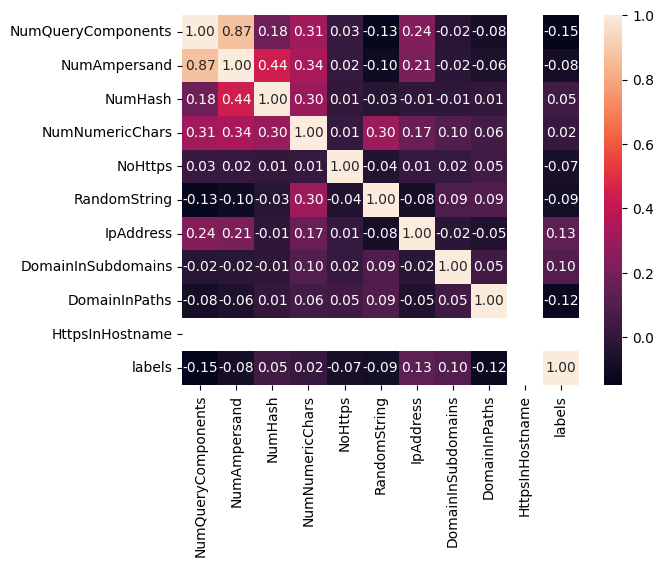

In [150]:
corr_fun(data_copy, 10,20)

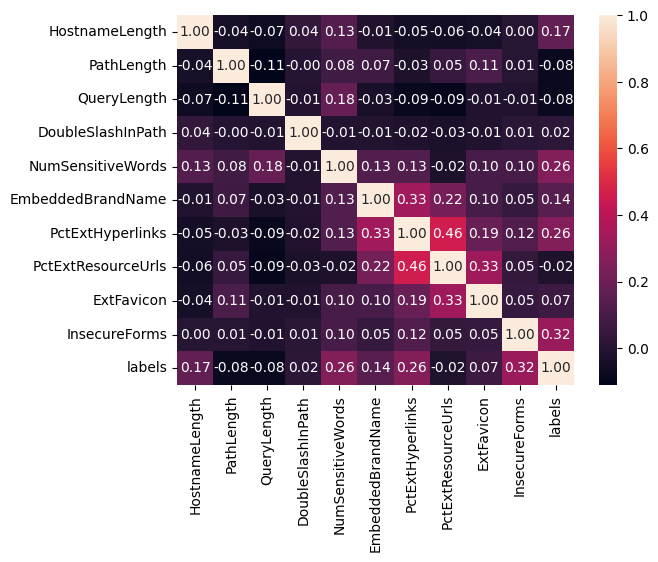

In [151]:
corr_fun(data_copy, 20,30)

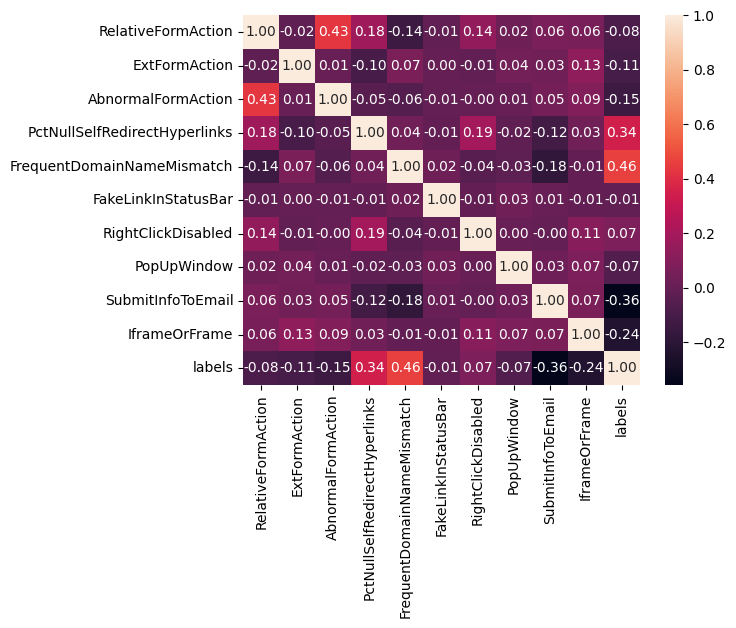

In [152]:
corr_fun(data_copy, 30,40)

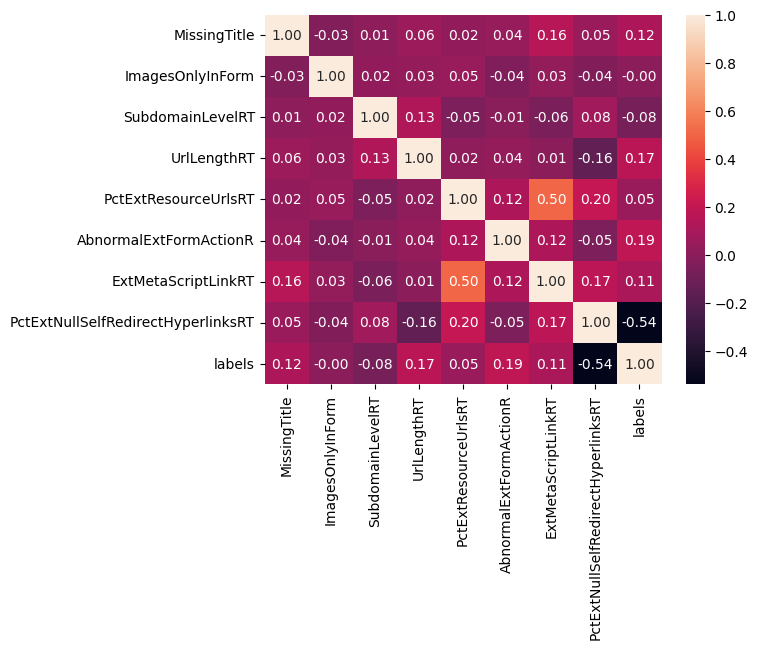

In [153]:
corr_fun(data_copy, 40,50)